<a href="https://colab.research.google.com/github/ohallao/MoneyBall-Brasileirao/blob/main/MoneyBall_Braisleirao_Zagueiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install soccerdata

In [2]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[01/05/25 16:26:02] INFO     No custom team name replacements found. You can configure these in       ]8;id=558142;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=183849;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#90\90]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     Custom league dict loaded from                                          ]8;id=586941;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=675489;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#194\194]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [3]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [4]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2024)
print(fbref.__doc__)

[01/05/25 16:26:04] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=614046;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=619533;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [5]:
# 1 - Join player_season_misc + player_season_std
 #por nome ou idade

# Filtrar jogadores com pelo menos 600 minutos jogados

# Remover goleiros (GK), Meias (MF) e Atacantes (FW)

#2- Selecionar as colunas   ('Playing Time', 'Min'),
#    ('Progression', 'PrgC'),
#    ('Progression', 'PrgP')
#    ('Aerial Duels', 'Won%'),
#    ('Aerial Duels', 'Won'),
#    ('Aerial Duels', 'Lost')
#     Fls
#   Defensive Action Tkl,TklW (%),Err,Int


In [6]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                   Playing Time               \
                                                             MP Starts   Min   
league      season team           player                                       
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio           20     14  1215   
                                  Alex Santana                4      0   101   
                                  Bento                       7      7   630   
                                  Bruno Praxedes              7      2   237   
                                  Bruno Zapelli              32     16  1412   

                                                         Performance      ...  \
                                                     90s         Gls Ast  ...   
league      season team           player                                  ...   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5           4   1  ...   
                                  Alex Santana       1.1           0   0  ...   
                                  Bento              7.0           0   0  ...   
                                  Bruno Praxedes     2.6           0   0  ...   
                                  Bruno Zapelli     15.7           0   5  ...   

                                                   Per 90 Minutes              \
                                                              Gls   Ast   G+A   
league      season team           player                                        
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio            0.3  0.07  0.37   
                                  Alex Santana                0.0   0.0   0.0   
                                  Bento                       0.0   0.0   0.0   
                                  Bruno Praxedes              0.0   0.0   0.0   
                                  Bruno Zapelli               0.0  0.32  0.32   

                                                                            \
                                                   G-PK G+A-PK    xG   xAG   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  0.3   0.37  0.26  0.18   
                                  Alex Santana      0.0    0.0  0.06   0.0   
                                  Bento             0.0    0.0   0.0   0.0   
                                  Bruno Praxedes    0.0    0.0  0.03  0.12   
                                  Bruno Zapelli     0.0   0.32  0.24   0.3   

                                                                          
                                                   xG+xAG  npxG npxG+xAG  
league      season team           player                                  
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   0.44  0.26     0.44  
                                  Alex Santana       0.06  0.06     0.06  
                                  Bento               0.0   0.0      0.0  
                                  Bruno Praxedes     0.15  0.03     0.15  
                                  Bruno Zapelli      0.54  0.24     0.54  

[5 rows x 33 columns]

In [7]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born Playing Time         ... Per 90 Minutes                                \
                  MP Starts  ...            Gls   Ast   G+A G-PK G+A-PK    xG   
0  1998           20     14  ...            0.3  0.07  0.37  0.3   0.37  0.26   
1  1995            4      0  ...            0.0   0.0   0.0  0.0    0.0  0.06   
2  1999            7      7  ...            0.0   0.0   0.0  0.0    0.0   0.0   
3  2002            7      2  ...            0.0   0.0   0.0  0.0    0.0  0.03   
4  2002           32     16  ...            0.0  0.32  0.32  0.0   0.32  0.24   

                               
    xAG xG+xAG  npxG npxG+xAG  
0  0.18   0.44  0.26     0.44  
1   0.0   0.06  0.06     0.06  
2   0.0    0.0   0.0      0.0  
3  0.12   0.15  0.03     0.15  
4   0.3   0.54  0.24     0.54  

[5 rows x 37 columns]

In [8]:
player_season_misc = fbref.read_player_season_stats(stat_type="misc")
player_season_misc.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                     90s Performance       \
                                                                CrdY CrdR   
league      season team           player                                    
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5           6    1   
                                  Alex Santana       1.1           2    0   
                                  Bento              7.0           1    0   
                                  Bruno Praxedes     2.6           0    0   
                                  Bruno Zapelli     15.7           3    0   

                                                                  ...          \
                                                   2CrdY Fls Fld  ... Crs Int   
league      season team           player                          ...           
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio     1  17  25  ...  36   4   
                                  Alex Santana         0   3   1  ...   0   0   
                                  Bento                0   1   0  ...   0   0   
                                  Bruno Praxedes       0   8   2  ...   7   2   
                                  Bruno Zapelli        0  19  18  ...  93   8   

                                                                              \
                                                   TklW PKwon PKcon OG Recov   
league      season team           player                                       
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   19     0     0  0    71   
                                  Alex Santana        0     0     0  0     6   
                                  Bento               0     0     1  0     4   
                                  Bruno Praxedes      4     0     0  0    13   
                                  Bruno Zapelli      19     0     0  0    70   

                                                   Aerial Duels              
                                                            Won Lost   Won%  
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio            7    7   50.0  
                                  Alex Santana                2    4   33.3  
                                  Bento                       2    0  100.0  
                                  Bruno Praxedes              3    2   60.0  
                                  Bruno Zapelli               4   17   19.0  

[5 rows x 21 columns]

In [9]:
player_season_misc = player_season_misc.reset_index()
print(player_season_misc.columns)
player_season_misc.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born   90s Performance  ...                                   Aerial Duels  \
                     CrdY  ... Crs Int TklW PKwon PKcon OG Recov          Won   
0  1998  13.5           6  ...  36   4   19     0     0  0    71            7   
1  1995   1.1           2  ...   0   0    0     0     0  0     6            2   
2  1999   7.0           1  ...   0   0    0     0     1  0     4            2   
3  2002   2.6           0  ...   7   2    4     0     0  0    13            3   
4  2002  15.7           3  ...  93   8   19     0     0  0    70            4   

               
  Lost   Won%  
0    7   50.0  
1    4   33.3  
2    0  100.0  
3    2   60.0  
4   17   19.0  

[5 rows x 25 columns]

In [10]:
player_season_def = fbref.read_player_season_stats(stat_type="defense")
player_season_def.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                     90s Tackles               \
                                                             Tkl TklW Def 3rd   
league      season team           player                                        
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5      30   19       6   
                                  Alex Santana       1.1       2    0       0   
                                  Bento              7.0       0    0       0   
                                  Bruno Praxedes     2.6       7    4       2   
                                  Bruno Zapelli     15.7      30   19       8   

                                                                    ...  \
                                                   Mid 3rd Att 3rd  ...   
league      season team           player                            ...   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio      20       4  ...   
                                  Alex Santana           1       1  ...   
                                  Bento                  0       0  ...   
                                  Bruno Praxedes         4       1  ...   
                                  Bruno Zapelli         12      10  ...   

                                                   Challenges             \
                                                          Att  Tkl% Lost   
league      season team           player                                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio         31  41.9   18   
                                  Alex Santana              5  20.0    4   
                                  Bento                     1   0.0    1   
                                  Bruno Praxedes            5  40.0    3   
                                  Bruno Zapelli            35  37.1   22   

                                                   Blocks         Int Tkl+Int  \
                                                   Blocks Sh Pass               
league      season team           player                                        
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio     22  0   22   4      34   
                                  Alex Santana          1  0    1   0       2   
                                  Bento                 0  0    0   0       0   
                                  Bruno Praxedes        7  3    4   2       9   
                                  Bruno Zapelli        16  3   13   8      38   

                                                   Clr Err  
                                                            
league      season team           player                    
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   8   0  
                                  Alex Santana       0   0  
                                  Bento              1   0  
                                  Bruno Praxedes     3   0  
                                  Bruno Zapelli     12   0  

[5 rows x 21 columns]

In [11]:
player_season_def = player_season_def.reset_index()
print(player_season_def.columns)
player_season_def.head()

MultiIndex([(    'league',        ''),
            (    'season',        ''),
            (      'team',        ''),
            (    'player',        ''),
            (    'nation',        ''),
            (       'pos',        ''),
            (       'age',        ''),
            (      'born',        ''),
            (       '90s',        ''),
            (   'Tackles',     'Tkl'),
            (   'Tackles',    'TklW'),
            (   'Tackles', 'Def 3rd'),
            (   'Tackles', 'Mid 3rd'),
            (   'Tackles', 'Att 3rd'),
            ('Challenges',     'Tkl'),
            ('Challenges',     'Att'),
            ('Challenges',    'Tkl%'),
            ('Challenges',    'Lost'),
            (    'Blocks',  'Blocks'),
            (    'Blocks',      'Sh'),
            (    'Blocks',    'Pass'),
            (       'Int',        ''),
            (   'Tkl+Int',        ''),
            (       'Clr',        ''),
            (       'Err',        '')],
           )


league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born   90s Tackles  ... Challenges            Blocks         Int Tkl+Int  \
                  Tkl  ...        Att  Tkl% Lost Blocks Sh Pass               
0  1998  13.5      30  ...         31  41.9   18     22  0   22   4      34   
1  1995   1.1       2  ...          5  20.0    4      1  0    1   0       2   
2  1999   7.0       0  ...          1   0.0    1      0  0    0   0       0   
3  2002   2.6       7  ...          5  40.0    3      7  3    4   2       9   
4  2002  15.7      30  ...         35  37.1   22     16  3   13   8      38   

  Clr Err  
           
0   8   0  
1   0   0  
2   1   0  
3   3   0  
4  12   0  

[5 rows x 25 columns]

In [12]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(col).strip() for col in player_season_std.columns]
player_season_misc.columns = ['_'.join(col).strip() for col in player_season_misc.columns]
player_season_def.columns = ['_'.join(col).strip() for col in player_season_def.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_misc.columns)
print(player_season_def.columns)

Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', '90s_', 'Performance_CrdY', 'Performance_CrdR',
       'Performance_2CrdY', 'Performance_Fls', 'Performance_Fld',
       'Performan

In [13]:

# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player_', 'team_','pos_','Playing Time_Min','Progression_PrgC', 'Progression_PrgP']
]
df_misc_selected = player_season_misc[
    ['player_', 'team_', 'Aerial Duels_Won%', 'Aerial Duels_Won', 'Aerial Duels_Lost','Performance_Fls','Performance_CrdY','Performance_CrdR','Performance_2CrdY']
]
df_def_selected = player_season_def[
    ['player_', 'team_','Challenges_Tkl', 'Challenges_Att','Challenges_Tkl%','Int_', 'Err_']
]

# 4. Realizar o merge dos três DataFrames com base nas colunas 'player_' e 'team_'
df_merged_1 = pd.merge(df_std_selected, df_misc_selected, on=['player_', 'team_'], how='inner')
df_merged = pd.merge(df_merged_1, df_def_selected, on=['player_', 'team_'], how='inner')

# 5. Exibir o resultado
print(df_merged.head())

            player_           team_   pos_  Playing Time_Min  \
0  Agustín Canobbio  Ath Paranaense  FW,MF              1215   
1      Alex Santana  Ath Paranaense  MF,FW               101   
2             Bento  Ath Paranaense     GK               630   
3    Bruno Praxedes  Ath Paranaense  MF,FW               237   
4     Bruno Zapelli  Ath Paranaense  MF,FW              1412   

   Progression_PrgC  Progression_PrgP  Aerial Duels_Won%  Aerial Duels_Won  \
0                47                57               50.0                 7   
1                 1                 2               33.3                 2   
2                 0                 0              100.0                 2   
3                 5                12               60.0                 3   
4                37                82               19.0                 4   

   Aerial Duels_Lost  Performance_Fls  Performance_CrdY  Performance_CrdR  \
0                  7               17                 6              

In [14]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK), Meias (MF), Atacantes(FW)
filtered_data = filtered_data[
    ~filtered_data[('pos_')].str.contains('GK|MF|FW', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem
print(filtered_data.head())


           player_           team_ pos_  Playing Time_Min  Progression_PrgC  \
9         Fernando  Ath Paranaense   DF               724                14   
16    Kaique Rocha  Ath Paranaense   DF              2486                11   
18  Leonardo Godoy  Ath Paranaense   DF              1639                16   
20    Lucas Belezi  Ath Paranaense   DF               793                 3   
22  Lucas Esquivel  Ath Paranaense   DF              2720                57   

    Progression_PrgP  Aerial Duels_Won%  Aerial Duels_Won  Aerial Duels_Lost  \
9                 36               60.0                15                 10   
16                84               76.3                74                 23   
18                61               39.4                13                 20   
20                15               68.8                22                 10   
22               178               69.8                37                 16   

    Performance_Fls  Performance_CrdY  Perfo

In [34]:
# Selecionar as colunas desejadas para análise
Zag = filtered_data[[
    ('player_'),
    ('team_'),
    ('pos_'),
    ('Playing Time_Min'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('Aerial Duels_Won%'),
    ('Aerial Duels_Won'),
    ('Aerial Duels_Lost'),
    ('Performance_Fls'),
    ('Performance_CrdY'),
    ('Performance_CrdR'),
    ('Performance_2CrdY'),
    ('Challenges_Tkl'),
    ('Challenges_Att'),
    ('Challenges_Tkl%'),
    ('Int_'),
    ('Err_'),
]]

# Renomear as colunas para facilitar o uso
Zag.columns = ['jogador','time','posicao', 'Minutos', 'Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros']

# Exibir as primeiras linhas para confirmar a seleção de colunas
print(Zag.head())


# Criar a nova coluna 'Aerial Duels ' no formato "50% (10/10)"
Zag['Aerial Duels '] = (
    Zag['Aerial Duel%'].astype(str) + '% (' +
    Zag['Aerial Duel Won'].astype(str) + '/' +
    Zag['Aerial Duel Lost'].astype(str) + ')')
# Remover jogadores com todas as métricas iguais a 0
Zag = Zag[(Zag[['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls','Desarmes Totais','Desarmes%','Interceptacao','Desarmes Certos',]] != 0).any(axis=1)]

# Exportar o dataframe para um arquivo CSV
Zag.to_csv('Zag_data.csv', index=False, encoding='utf-8-sig')
# Exibir as primeiras linhas para conferir
Zag.head


           jogador            time posicao  Minutos  Prgc  PrgP  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  2 Yellow Card  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  Erros
9         Fernando  Ath Paranaense      DF      724    14    36          60.0               15                10     13            4         0              0                6               14       42.9             18      0
16    Kaique Rocha  Ath Paranaense      DF     2486    11    84          76.3               74                23     19            3         0              0               26               40       65.0             37      2
18  Leonardo Godoy  Ath Paranaense      DF     1639    16    61          39.4               13                20     32            5         0              0                8               18       44.4             11      0
20    Lucas Belezi  Ath Paranaense      DF      793     3    15          68.8               22      

<bound method NDFrame.head of             jogador            time posicao  Minutos  Prgc  PrgP  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  2 Yellow Card  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  Erros  Aerial Duels 
9          Fernando  Ath Paranaense      DF      724    14    36          60.0               15                10     13            4         0              0                6               14       42.9             18      0  60.0% (15/10)
16     Kaique Rocha  Ath Paranaense      DF     2486    11    84          76.3               74                23     19            3         0              0               26               40       65.0             37      2  76.3% (74/23)
18   Leonardo Godoy  Ath Paranaense      DF     1639    16    61          39.4               13                20     32            5         0              0                8               18       44.4             11      0  39.4% (13/20)
20     Lucas Belezi  Ath Paranaense      DF      793     3    15          68.8               22                10      6            2         0              0                7               10       70.0             13      0  68.8% (22/10)
22   Lucas Esquivel  Ath Paranaense      DF     2720    57   178          69.8               37                16     32            5         1              1               33               67       49.3             35      0  69.8% (37/16)
..              ...             ...     ...      ...   ...   ...           ...              ...               ...    ...          ...       ...            ...              ...              ...        ...            ...    ...            ...
713   Lucas Esteves         Vitória      DF     2932    46   108          60.9               56                36     36           10         0              0               30               43       69.8             40      0  60.9% (56/36)
722           Neris         Vitória      DF     1359     9    37          60.3               35                23     17            3         1              0               12               19       63.2             11      0  60.3% (35/23)
726    Raúl Cáceres         Vitória      DF     1695    50    49          50.0               19                19     22            2         0              0               28               47       59.6             14      0  50.0% (19/19)
730          Wagner         Vitória      DF     3156    23   103          54.8               85                70     16            5         1              0               19               28       67.9             50      1  54.8% (85/70)
731    Willean Lepo         Vitória      DF     1789    52    78          50.0               36                36     18            5         0              0               45               77       58.4             30      1  50.0% (36/36)

[144 rows x 19 columns]>

### **2. Criar modelos de classificação para  (ZAGUEIRO)**

In [20]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Zag[['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Interceptacao','Erros','Desarmes Certos']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=5, init='random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
Zag['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(Zag[['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Desarmes%','Interceptacao','Erros','Desarmes%']])

     Prgc  PrgP  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  \
9      14    36          60.0               15                10     13   
16     11    84          76.3               74                23     19   
18     16    61          39.4               13                20     32   
20      3    15          68.8               22                10      6   
22     57   178          69.8               37                16     32   
..    ...   ...           ...              ...               ...    ...   
713    46   108          60.9               56                36     36   
722     9    37          60.3               35                23     17   
726    50    49          50.0               19                19     22   
730    23   103          54.8               85                70     16   
731    52    78          50.0               36                36     18   

     Yellow Card  Red Card  2 Yellow Card  Desarmes%  Interceptacao  Erros  \
9              4     

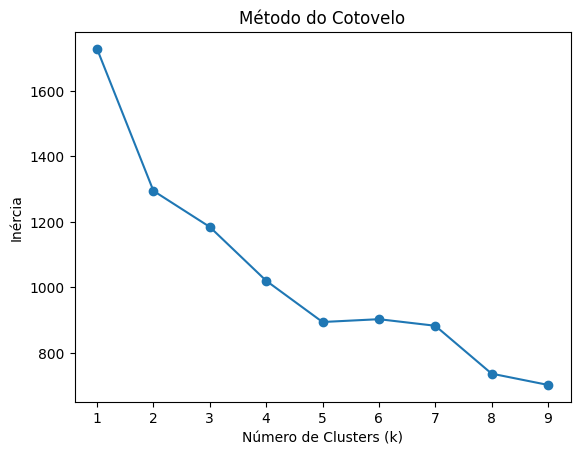

In [21]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [22]:
# Verificar se há algum NaN em X_scaled
tem_nan = np.isnan(X_scaled).any()

if tem_nan:
    print("X_scaled contém NaNs.")
else:
    print("X_scaled não contém NaNs.")

# Para ver a quantidade de NaNs por coluna:
nans_por_coluna = np.isnan(X_scaled).sum(axis=0)
print("Número de NaNs por coluna:", nans_por_coluna)

# Para ver a quantidade total de NaNs:
total_nans = np.isnan(X_scaled).sum()
print("Número total de NaNs:", total_nans)

X_scaled não contém NaNs.
Número de NaNs por coluna: [0 0 0 0 0 0 0 0 0 0 0 0]
Número total de NaNs: 0


In [23]:
# Calcular as médias de cada cluster apenas para colunas numéricas
cluster_summary = Zag.groupby('Cluster').agg({col: 'mean' for col in Zag.select_dtypes(include=['number']).columns})
print(cluster_summary)

             Minutos       Prgc        PrgP  Aerial Duel%  Aerial Duel Won  \
Cluster                                                                      
0        1081.017241   9.948276   40.103448     58.924138        23.362069   
1        1856.827586  41.793103   89.275862     45.468966         18.62069   
2             1910.0  17.545455   74.727273     59.881818        47.727273   
3        2363.310345  13.551724   77.827586     63.282759         66.37931   
4        2492.823529  54.705882  116.529412     54.935294        35.058824   

         Aerial Duel Lost      Fouls  Yellow Card  Red Card  2 Yellow Card  \
Cluster                                                                      
0               15.189655  13.896552     2.862069  0.224138       0.034483   
1               19.344828  18.862069     3.655172  0.310345       0.103448   
2               29.636364  24.272727     8.545455  1.545455       1.181818   
3               37.862069  24.448276     5.965517  0.206897    

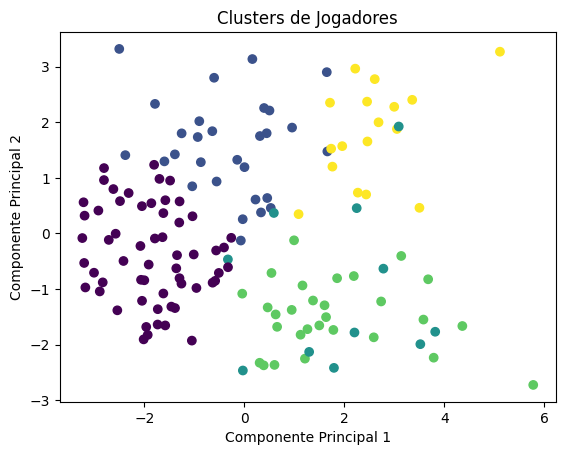

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [25]:
# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_columns = Zag.select_dtypes(include=np.number).columns
correlation_matrix = Zag[numeric_columns].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                   Minutos      Prgc      PrgP  Aerial Duel%  Aerial Duel Won  \
Minutos           1.000000  0.523482  0.763030      0.056546         0.572074   
Prgc              0.523482  1.000000  0.723579     -0.312262        -0.136294   
PrgP              0.763030  0.723579  1.000000     -0.131122         0.221091   
Aerial Duel%      0.056546 -0.312262 -0.131122      1.000000         0.568098   
Aerial Duel Won   0.572074 -0.136294  0.221091      0.568098         1.000000   
Aerial Duel Lost  0.704605  0.138084  0.398905      0.109308         0.791812   
Fouls             0.560545  0.361196  0.438668      0.113080         0.388492   
Yellow Card       0.457500  0.038262  0.284510      0.155579         0.445143   
Red Card          0.045809 -0.019745  0.067937      0.037438         0.077835   
2 Yellow Card     0.071763  0.048919  0.116016     -0.027721         0.031199   
Desarmes Certos   0.575356  0.580286  0.580237     -0.118429         0.173791   
Desarmes Totais   0.525447  

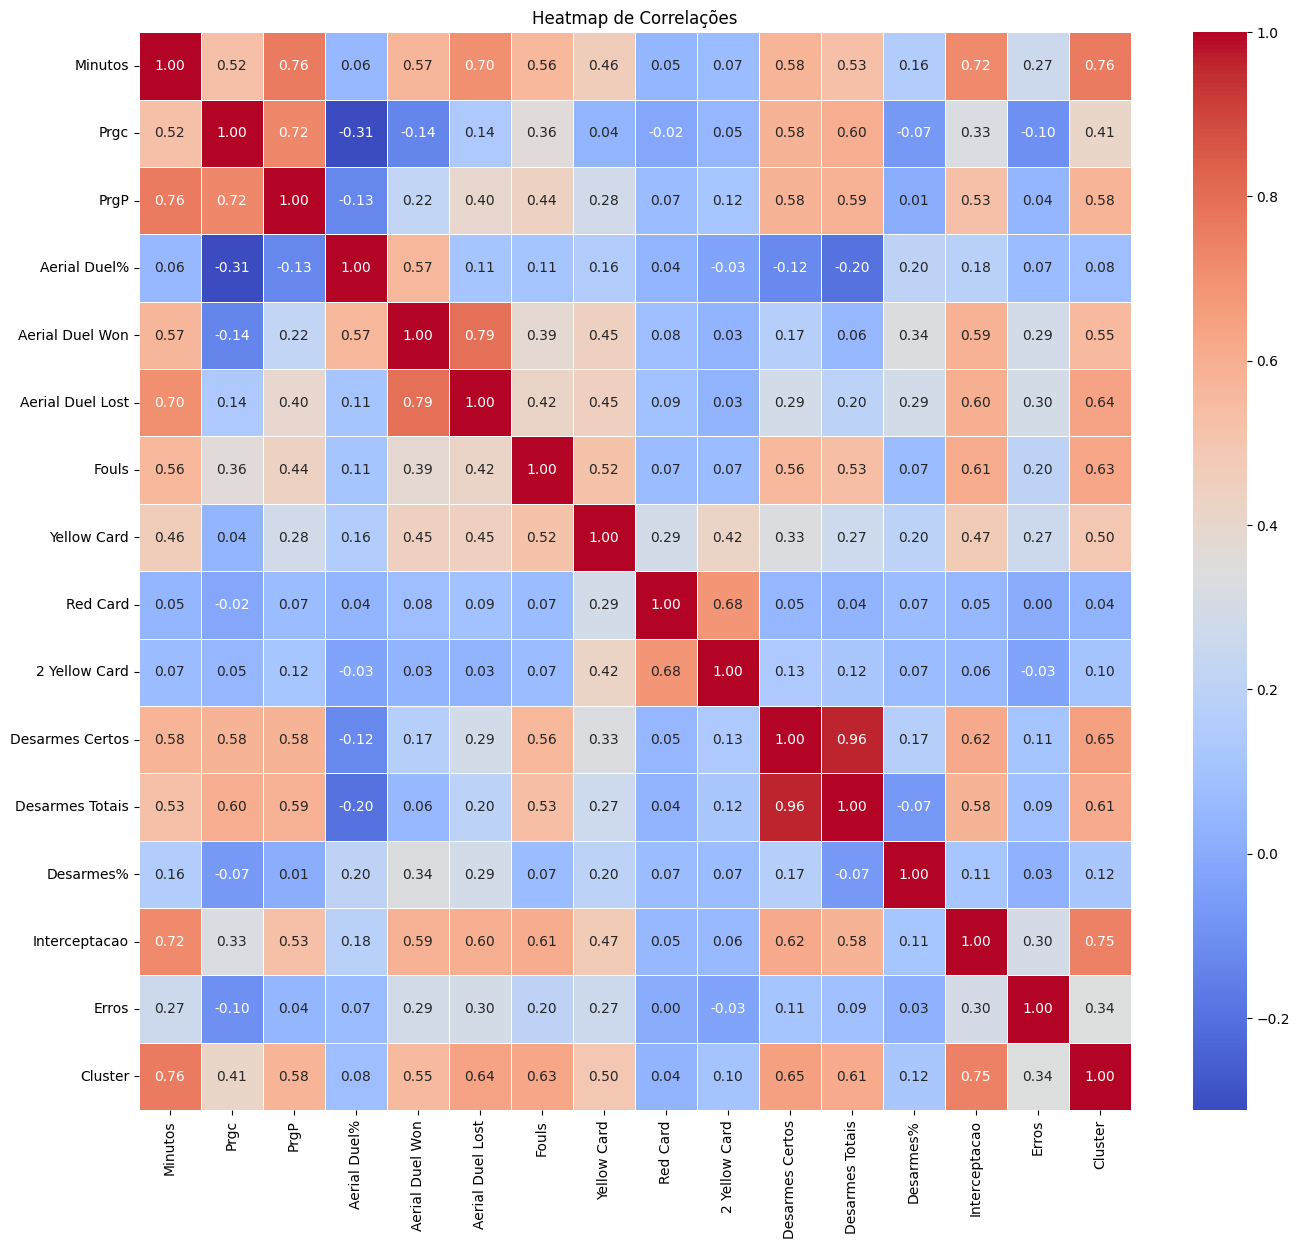

In [26]:
plt.figure(figsize=(16, 14))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlações')
plt.show()

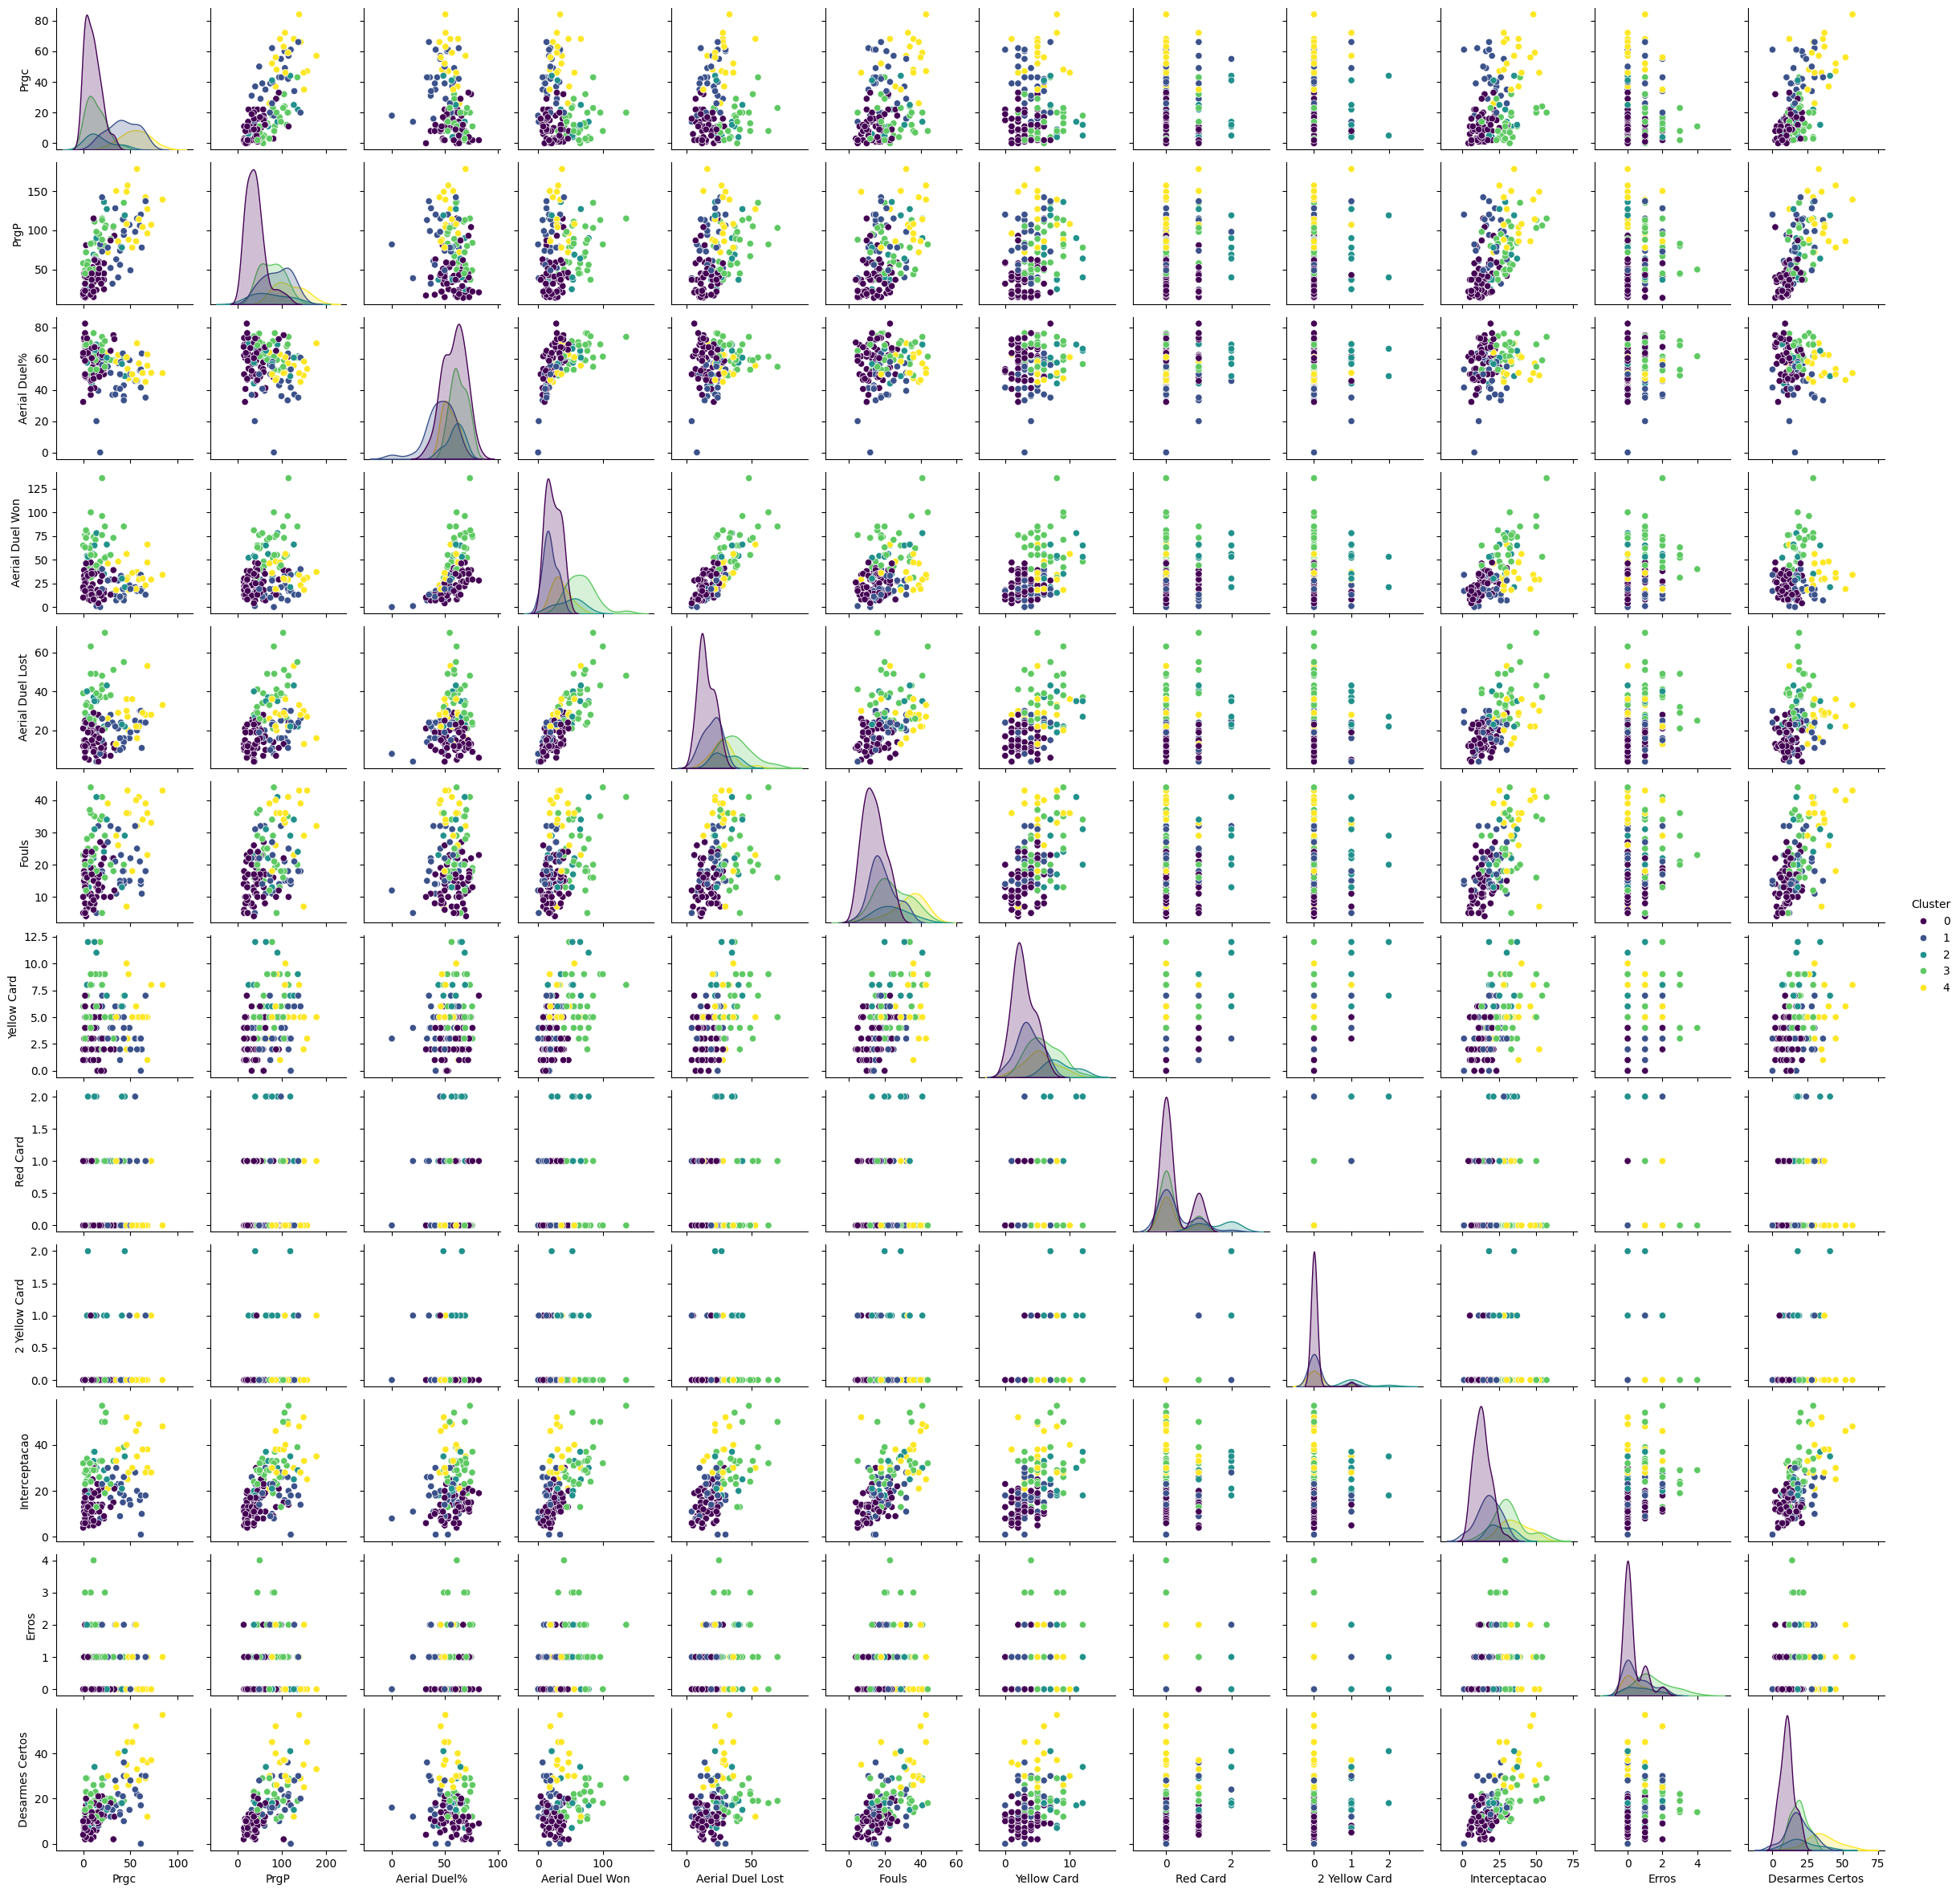

In [27]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Interceptacao','Erros','Desarmes Certos','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(Zag[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()


## **Comportamento entre Variáveis (Foco em Zagueiros)**

### **Minutos vs. Aerial Duel Won**
- **Cluster 4 (Preto):** Se destaca com o maior número médio de minutos e duelos aéreos ganhos, características esperadas de zagueiros que jogam regularmente e são fundamentais em disputas aéreas, tanto defensivas quanto ofensivas (bolas paradas).
- **Cluster 0 (Roxo):** Apresenta menor envolvimento em duelos aéreos, o que sugere a predominância de laterais ou zagueiros menos físicos.

### **PrgP (Passes Progressivos) vs. Desarmes Certos**
- **Cluster 3 (Amarelo):** Apresenta altos valores de passes progressivos e desarmes certos, indicando um perfil de zagueiros modernos, que combinam boa saída de bola com eficiência defensiva.
- **Cluster 2 (Verde):** Com valores menores de passes progressivos, se alinha ao perfil de zagueiros mais tradicionais, focados na recuperação da posse e no bloqueio defensivo.

### **Aerial Duel Lost vs. Fouls**
- **Cluster 1 (Azul):** Combina poucos duelos aéreos perdidos com baixa média de faltas, apontando para zagueiros técnicos que dependem de bom posicionamento e leitura de jogo em vez de disputas físicas intensas.
- **Cluster 2 (Verde):** Apresenta mais duelos perdidos e faltas cometidas, características de zagueiros físicos que enfrentam atacantes mais desafiadores ou situações de alta pressão.

### **Interceptações vs. Yellow Card**
- **Cluster 4 (Preto):** Lidera em interceptações, um indicativo claro de zagueiros que conseguem antecipar jogadas, algo essencial na defesa central. Apesar disso, mantém um número moderado de cartões amarelos, refletindo uma abordagem eficiente e disciplinada.
- **Cluster 0 (Roxo):** Apresenta menor número de interceptações, mas também menos cartões, sugerindo jogadores mais focados em ações ofensivas, possivelmente laterais com papel de apoio.

### **Desarmes Certos vs. Desarmes Totais**
- **Cluster 4 (Preto):** Lidera em desarmes certos e totais, reforçando seu perfil de zagueiros altamente eficazes em ações defensivas.
- **Cluster 3 (Amarelo):** Também apresenta bom desempenho, mas com um perfil mais híbrido, combinando recuperação de bola e contribuição ofensiva.
- PrgR vs G-PK (Gols sem Pênalti)
A relação sugere que jogadores que recebem mais passes progressivos também têm mais chances de marcar gols.
Cluster 3 é um destaque aqui, indicando jogadores com alta produtividade ofensiva: recebem passes em progressão e convertem essas oportunidades em gols.

- xG vs. xAG:

Existe uma correlação positiva clara entre essas variáveis. Jogadores ou times que criam oportunidades (xAG) tendem a ter uma alta expectativa de gols (xG). Isso é consistente com a ideia de que bons passadores estão relacionados à criação de chances claras de gol.

- PrgR vs. Ações Ofensivas:

Há uma correlação moderada entre PrgR e Ações Ofensivas. Embora jogadores que avancem a bola contribuam ofensivamente, existem exceções (pontos com alta ação ofensiva, mas baixa PrgR). Isso pode indicar estilos de jogo diferentes — alguns jogadores participam sem conduzir muito a bola

- G-PK vs. xG:

A correlação positiva faz sentido, pois a expectativa de gol (xG) tende a ser maior para jogadores que marcam mais gols, mesmo excluindo pênaltis. Clusters com valores altos indicam jogadores eficientes na finalização, enquanto clusters com baixo xG e G-PK podem apontar jogadores com menor participação em finalizações.

- Assistências vs. xAG:

Embora esperemos uma forte correlação entre assistências e assistências esperadas, há alguns pontos que se destacam por terem alto valor de assistências, mas baixo xAG. Isso pode indicar jogadores que têm poucos passes decisivos esperados, mas ainda assim conseguem criar gols

- PrgR vs Assistências e xA (Expected Assists)
A correlação entre passes recebidos em progressão e assistências/xA é menos evidente. Isso sugere que os jogadores que recebem essas bolas em profundidade podem finalizar as jogadas por si mesmos, sem depender tanto de passes finais.
Esse comportamento é típico de jogadores que são finalizadores, como pontas ou atacantes centrais, que recebem a bola já em posição avançada

- Aerial Duel Won vs Aerial Duel Lost:
Existe um comportamento curioso em que alguns clusters têm muitos duelos perdidos e poucos ganhos, enquanto outros apresentam equilíbrio.
O Cluster 0 parece conter jogadores mais fracos em duelos aéreos, enquanto o Cluster 1 pode ser mais equilibrado em termos de ganho e perda.
---



### **Comportamento de Variáveis e Distribuição de Clusters para Zagueiros**

---

### **1. Análise de Correlações com Insights**

#### **Correlação Positiva Alta**
1. **PrgP (Progressão por Passe) vs Minutos (0.76):**
   Zagueiros que jogam mais acumulam maior progressão por passe, mostrando consistência em participações ofensivas a partir da defesa.

2. **Desarmes Totais vs Desarmes Certos (0.92):**
   Alta correlação reflete que zagueiros com mais desarmes também são precisos em suas ações defensivas.

3. **Aerial Duel Won vs Aerial Duel% (0.79):**
   Alta taxa de sucesso em duelos aéreos está associada ao número de duelos ganhos, destacando zagueiros dominantes no jogo aéreo.

4. **Interceptações vs Desarmes Totais (0.83):**
   Zagueiros que realizam mais interceptações também acumulam desarmes, sugerindo leitura de jogo e habilidade defensiva.

---

#### **Correlação Moderada Positiva**
1. **PrgC (Progressão por Condução) vs Interceptações (0.72):**
   Zagueiros que progridem com a bola também possuem boa leitura para interceptar jogadas adversárias.

2. **Minutos vs Desarmes Totais (0.65):**
   Jogadores com mais minutos acumulam mais ações defensivas, mostrando consistência ao longo das partidas.

3. **Crosses vs PrgP (0.52):**
   Alguns zagueiros que participam ofensivamente também realizam cruzamentos, principalmente em bolas paradas.

---

#### **Correlação Negativa Moderada**
1. **Cluster vs PrgP (-0.42):**
   Atribuição ao cluster impacta negativamente o progresso por passe, indicando variações no estilo de jogo entre os grupos.

2. **Cluster vs Desarmes Certos (-0.41):**
   Diferenças entre clusters refletem impactos no número de desarmes certos.

3. **Aerial Duel Lost vs Aerial Duel% (-0.70):**
   Zagueiros que perdem menos duelos têm maior eficiência em disputas aéreas.

---

---

### **2. Perfis dos Clusters com Médias**

#### **Cluster 0 (Defensores Interceptores)**
- **Perfil:**
  - **Minutos:** 1081.0
  - **Interceptações:** 13.2
  - Alta média de desarmes certos (10.4).
- **Estilo de Jogo:** Zagueiros com forte leitura defensiva e foco em interceptações.
- **Função Principal:** Proteger a área e interromper jogadas adversárias.

---

#### **Cluster 1 (Defensores Físicos)**
- **Perfil:**
  - **Minutos:** 1856.8
  - **Aerial Duel Won:** 18.6
  - Alta média de duelos perdidos (19.3).
- **Estilo de Jogo:** Foco em disputas físicas e jogo aéreo.
- **Função Principal:** Neutralizar adversários em bolas altas e disputas corpo a corpo.

---

#### **Cluster 2 (Zagueiros Equilibrados)**
- **Perfil:**
  - **Minutos:** 1910.0
  - Alta média em desarmes (32.4) e interceptações (25.9).
- **Estilo de Jogo:** Zagueiros que combinam ações defensivas e progressão ofensiva.
- **Função Principal:** Contribuir defensivamente e iniciar transições rápidas.

---

#### **Cluster 3 (Construtores de Jogo)**
- **Perfil:**
  - **Minutos:** 2363.3
  - **PrgP:** 77.8
  - Alta média de progressão ofensiva.
- **Estilo de Jogo:** Foco na construção de jogadas desde a defesa.
- **Função Principal:** Avançar com passes e criar jogadas ofensivas.

---

#### **Cluster 4 (Zagueiros Completo)**
- **Perfil:**
  - **Minutos:** 2492.8
  - Alta média de desarmes (62.8) e interceptações (35.7).
- **Estilo de Jogo:** Defensores completos com forte contribuição em todas as áreas.
- **Função Principal:** Garantir solidez defensiva enquanto auxiliam na transição ofensiva.

---

### **3. Destaques em Comportamento**

1. **Aerial Duel Won vs Aerial Duel% (0.79):**
   Sucesso em disputas aéreas reflete boa habilidade física e posicionamento.

2. **Desarmes Totais vs Interceptações (0.83):**
   Relação forte entre ações defensivas, mostrando jogadores sólidos na defesa.

3. **PrgP vs Minutos (0.76):**
   Zagueiros com mais tempo de jogo têm maior impacto em progressões por passe.

4. **Cluster vs Desarmes Certos (-0.41):**
   Diferenças de estilo tático entre clusters impactam a quantidade de desarmes precisos.


In [28]:
cluster_names = {
    0: 'zagueiros defensivos',
    1: 'zagueiros fisicos',
    2: 'zagueiros equilibrados',
    3: 'zagueiros modernos',
    4: 'zagueiros completos'
}

# Adicionar nomes ao DataFrame
Zag['Perfil'] = Zag['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(Zag[['jogador','time','posicao', 'Minutos', 'Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros','Perfil']].head())

           jogador            time posicao  Minutos  Prgc  PrgP  Aerial Duel%  \
9         Fernando  Ath Paranaense      DF      724    14    36          60.0   
16    Kaique Rocha  Ath Paranaense      DF     2486    11    84          76.3   
18  Leonardo Godoy  Ath Paranaense      DF     1639    16    61          39.4   
20    Lucas Belezi  Ath Paranaense      DF      793     3    15          68.8   
22  Lucas Esquivel  Ath Paranaense      DF     2720    57   178          69.8   

    Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  \
9                15                10     13            4         0   
16               74                23     19            3         0   
18               13                20     32            5         0   
20               22                10      6            2         0   
22               37                16     32            5         1   

    2 Yellow Card  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  \
9    

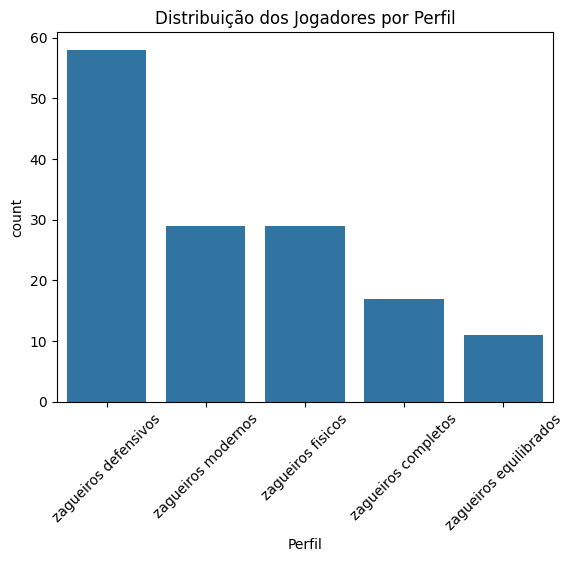

In [29]:
sns.countplot(data=Zag, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()


In [30]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = Zag[Zag['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao', 'Minutos', 'Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "zagueiros modernos"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)



Jogadores no perfil: zagueiros modernos
                  jogador                 time posicao  Minutos  Prgc  PrgP  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  2 Yellow Card  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  Erros
16           Kaique Rocha       Ath Paranaense      DF     2486    11    84          76.3               74                23     19            3         0              0               26               40       65.0             37      2
24          Mateo Gamarra       Ath Paranaense      DF     1482     4    59          58.5               48                34     15            7         0              0               17               31       54.8             25      1
29          Thiago Heleno       Ath Paranaense      DF     2278     0    58          62.5               65                39     23            6         1              0               10               19       52.6             32      1
31        A

In [31]:
# Dicionário dos peso para cada métrica
pesos = {
    'Prgc': 2,
    'PrgP': 2,
    'Aerial Duel Won': 10,
    'Fouls': -3,
    'Yellow Card': -5,
    'Red Card': -10,
    'Desarmes Certos': 10,
    'Interceptacao' : 5,
    'Erros' : -2

}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    return coluna / coluna.max()

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    Zag[coluna + '_Pontuacao'] = Zag[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
Zag['Pontuacao_Total'] = Zag[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = Zag['Pontuacao_Total'].min()
max_pontuacao = Zag['Pontuacao_Total'].max()
Zag['Pontuacao'] = (
    (Zag['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'zagueiros modernos'
jogadores_filtrados = Zag[Zag['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: zagueiros modernos
 Ranking                time posicao              jogador             Perfil  Pontuacao
       1               Bahia      DF              Gabriel zagueiros modernos      100.0
       2            Criciúma      DF     Rodrigo Fagundes zagueiros modernos  75.773746
       3            Cruzeiro      DF         João Marcelo zagueiros modernos  70.437567
       4             Vitória      DF               Wagner zagueiros modernos  68.996798
       5           Palmeiras      DF        Gustavo Gómez zagueiros modernos  62.913554
       6      Ath Paranaense      DF         Kaique Rocha zagueiros modernos  60.565635
       7           Fortaleza      DF      Guilherme Tinga zagueiros modernos  59.445037
       8              Cuiabá      DF       Marllon Borges zagueiros modernos  58.164354
       9       Vasco da Gama      DF               Maicon zagueiros modernos  58.164354
      10           Juventude      DF          Danilo Boza zagueiros 

In [32]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'zagueiros modernos'  # Defina o perfil desejado
jogadores_filtrados = Zag[Zag['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))


Jogadores disponíveis no perfil 'zagueiros modernos': ['Kaique Rocha', 'Mateo Gamarra', 'Thiago Heleno', 'Adriano Martins', 'Gabriel', 'Kanu', 'Bastos', 'Cacá', 'Félix Torres Caicedo', 'Rodrigo Fagundes', 'Tobias Figueiredo', 'João Marcelo', 'Zé Ivaldo', 'Alan Empereur', 'Marllon Borges', 'Thiago dos Santos', 'Guilherme Tinga', 'Titi', 'Tomás Cardona', 'Rodrigo Ely', 'Vitão', 'Danilo Boza', 'Gustavo Gómez', 'Luan Cândido', 'Pedro Henrique', 'Alan Franco', 'Robert Arboleda', 'Maicon', 'Wagner']
Digite o nome do jogador (ou 'sair' para finalizar): Cacá
Insira o valor de mercado para Cacá (€M): 2
Digite o nome do jogador (ou 'sair' para finalizar): João Marcelo
Insira o valor de mercado para João Marcelo (€M): 4
Digite o nome do jogador (ou 'sair' para finalizar): Gustavo Gómez
Insira o valor de mercado para Gustavo Gómez (€M): 4
Digite o nome do jogador (ou 'sair' para finalizar): Gustavo Gómez
Jogador não encontrado. Tente novamente.
Digite o nome do jogador (ou 'sair' para finalizar): 


Jogadores selecionados: Kaique Rocha, Gabriel, João Marcelo, Wagner
     Minutos  Prgc  PrgP  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  2 Yellow Card  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  Erros
16      2486    11    84          76.3               74                23     19            3         0              0               26               40       65.0             37      2
118     3150    20   115          73.9              136                48     41            8         0              0               29               41       70.7             57      2
262     2692    43   135          60.7               85                55     20            7         1              0               19               23       82.6             39      1
730     3156    23   103          54.8               85                70     16            5         1              0               19               28       67.9             50      1


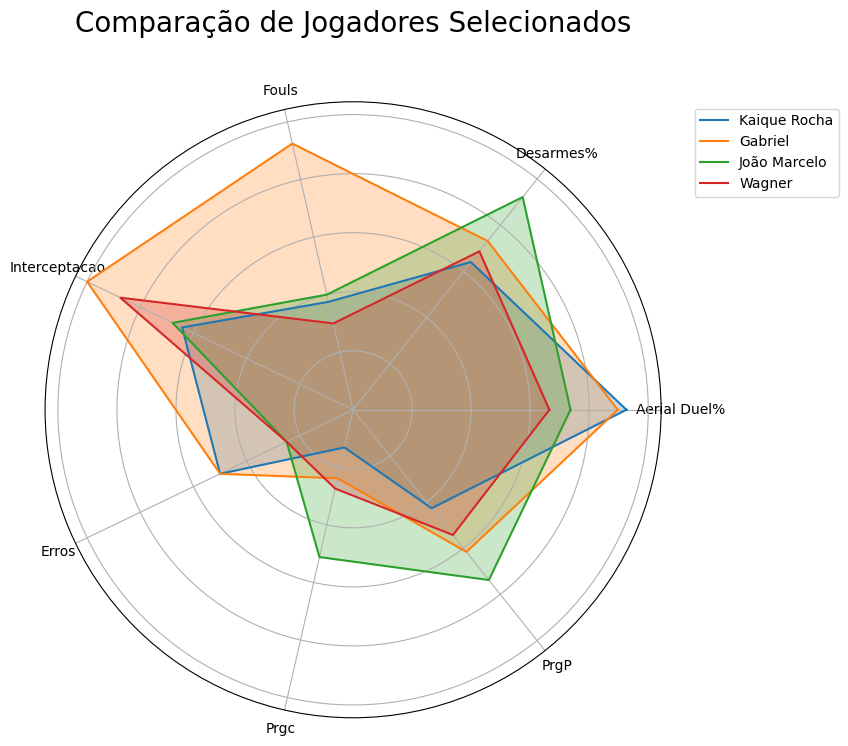

In [33]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['Minutos', 'Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros',]])

    # Definir as métricas a serem exibidas no radar
    metricas = ['Aerial Duel%', 'Desarmes%', 'Fouls', 'Interceptacao','Erros','Prgc', 'PrgP',]
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Gabriel', 'João Marcelo','Wagner','Kaique Rocha']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, Zag)